# Error mitigation for reliable quantum computation (Simulation of teleportation)

June 29th 2022

코코폿(KoKoPos): Ha-Eum Kim, Myeongwon Lee, and Seung-Gyo Jeong

  Developing computers (classical) have grown up many fields not only research but also industry. Now, quantum computing using quantum information science is being platform for these development. Quantum computers are expected to be faster than classical computers, so that quantum computer could be a game changer for the cutting edge of technology. But, current quantum computers cannot avoid errors due to many kinds of inperfection such as noise, and unwanted coupling. 
  
  In this hackerthon, we tried to mitigate errors occured in quantum circuit using several methods such as readout correction, dynamical decoupling (DD), and randomized compiling. These methods were confirmed using actual quantum computing hardware with simulating quantum teleportation algorithm.

## Readout correction

A state of qubit could be misread as the other state by imperfection.
Fortunately, this readout error can be modeled statistically to some extent, so the error can be
corrected based on previous measurement statistics. This method is easy-to-use and very
powerful. See detailed explanation in Ref. [1].

In [11]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, IBMQ, Aer, assemble, transpile
from numpy import pi
import qiskit

# import basic plot tools
from qiskit.visualization import plot_histogram

In [12]:
TOKEN ="7c63a3df503d9b12fe8ded721262e21daf7a0f1037e84d2ac5e71da9cba650de370d74614137f10e393be53907f6a3e6864476f46bf8039f3775bd4a69c6c930"

if IBMQ.active_account() is None:
    IBMQ.enable_account(TOKEN)

IBMQ.providers()

provider = IBMQ.get_provider(hub='ibm-q-education',group='ibm-quantum-1',project='quantum-hackatho')
device =provider.get_backend("ibm_perth")

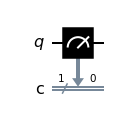

In [13]:
#ket0
qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')

circuit = QuantumCircuit(qr, cr)

circuit.measure(qr[0],cr[0])
circuit.draw()

Job Status: job has successfully run


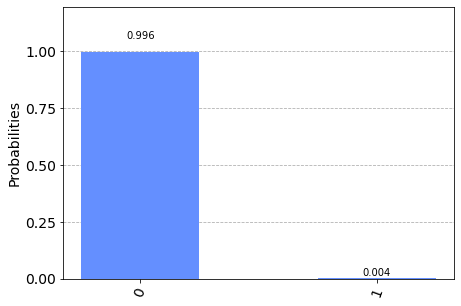

In [14]:
# Set provider
from qiskit.tools.monitor import job_monitor
transpiled = transpile(circuit, device, optimization_level=3)

job = device.run(transpiled, shots = 1000)
job_monitor(job, interval = 2)

results = job.result()
counts = results.get_counts(circuit)
plot_histogram(counts)

 First, we measure with initial state $|0\rangle$. The result of measurement implies about 1% error included.

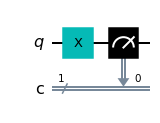

In [8]:
#ket1
qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')

circuit = QuantumCircuit(qr, cr)

circuit.x(qr[0])
circuit.measure(qr[0],cr[0])
circuit.draw()

Job Status: job has successfully run


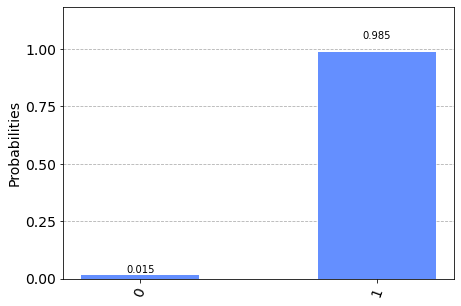

In [9]:
# Set provider
from qiskit.tools.monitor import job_monitor
transpiled = transpile(circuit, device, optimization_level=3)

job = device.run(transpiled, shots = 1000)
job_monitor(job, interval = 2)

results = job.result()
counts = results.get_counts(circuit)
plot_histogram(counts)

 We set up the quantum circuit with an X gate of a single qubit to initialized the state as $|1\rangle$. The outcome means that the X gate measurement about 1.5% error included. Before the X gate experiment, we show that our measurements contain an error value of about 1%. Therefore, the X gate has approximately 0.5% errors.

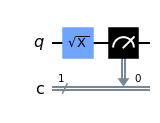

In [10]:
#kety0
qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')

circuit = QuantumCircuit(qr, cr)

circuit.sx(qr[0])
circuit.measure(qr[0],cr[0])
circuit.draw()

Job Status: job has successfully run


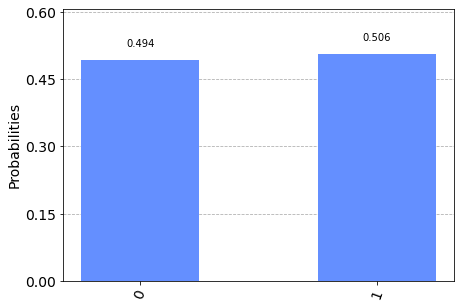

In [11]:
# Set provider
from qiskit.tools.monitor import job_monitor
transpiled = transpile(circuit, device, optimization_level=3)

job = device.run(transpiled, shots = 1000)
job_monitor(job, interval = 2)

results = job.result()
counts = results.get_counts(circuit)
plot_histogram(counts)

To double check the readout error, we do the same experiments with $\hat{Y}$ basis. We generate a square root gate to initialized to $|0_y\rangle$. We obtain the square root gate error of about 1%.

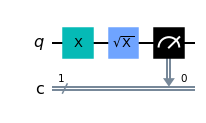

In [12]:
#kety1
qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')

circuit = QuantumCircuit(qr, cr)

circuit.x(qr[0])
circuit.sx(qr[0])
circuit.measure(qr[0],cr[0])
circuit.draw()

Job Status: job has successfully run


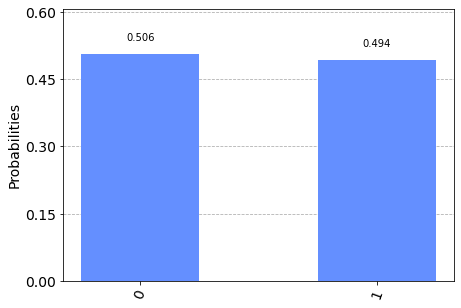

In [13]:
# Set provider
from qiskit.tools.monitor import job_monitor
transpiled = transpile(circuit, device, optimization_level=3)

job = device.run(transpiled, shots = 1000)
job_monitor(job, interval = 2)

results = job.result()
counts = results.get_counts(circuit)
plot_histogram(counts)

 We generate a square root gate to initialized to $|1_y\rangle$. The result shows about 1% error.

In this chapter, we make up the quantum circuit with gates and single qubit.
The result of our experiments for readout error shows there are nearby 0.5~1% error.  

## Quantum teleportation

Before going to other error mitigation methods, we explain the circuit we loaded. The circuit looks like as below:

In [15]:
#Bell Unitary
def Bell(circuit, q1,q2):
    circuit.sx(q1)
    circuit.cx(q1, q2)

def invBell(circuit, q1, q2):
    circuit.cx(q1, q2)
    circuit.sx(q1)

In [16]:
#Measurement by Z
def MZ(circuit):
    circuit.measure(qr[0], cr[0])
    circuit.measure(qr[1], cr[1])
    circuit.measure(qr[2], cr[2])
    circuit.measure(qr[3], cr[3])
    circuit.barrier()
    circuit.measure(qr[4], cr[4])
    
#Measurement by Y
def MY(circuit):
    circuit.measure(qr[0], cr[0])
    circuit.measure(qr[1], cr[1])
    circuit.measure(qr[2], cr[2])
    circuit.measure(qr[3], cr[3])
    circuit.barrier()
    circuit.sx(qr[4])
    circuit.measure(qr[4], cr[4])

#Measurement by X
def MX(circuit):
    circuit.measure(qr[0], cr[0])
    circuit.measure(qr[1], cr[1])
    circuit.measure(qr[2], cr[2])
    circuit.measure(qr[3], cr[3])
    circuit.barrier()
    circuit.rz(pi/2,qr[4])
    circuit.sx(qr[4])
    circuit.measure(qr[4], cr[4])


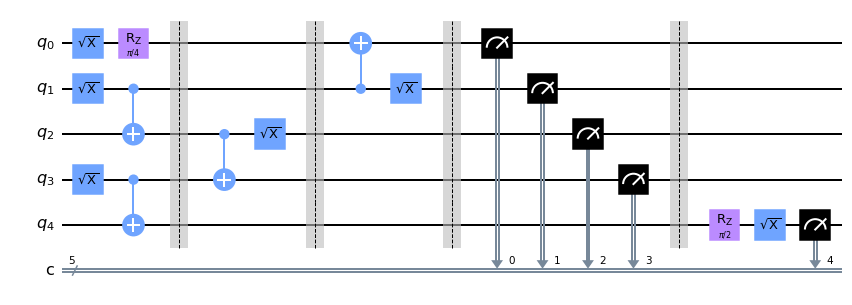

In [17]:
# TELEPORTATION
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(5, 'c')

#Z
circuit = QuantumCircuit(qr, cr)
#initial state
circuit.sx(qr[0])
circuit.rz(pi/4,qr[0])
#teleportation
Bell(circuit,qr[1],qr[2])
Bell(circuit,qr[3],qr[4])
circuit.barrier()
invBell(circuit, qr[2],qr[3])
circuit.barrier()
invBell(circuit, qr[1],qr[0])
circuit.barrier()
MX(circuit)

circuit.draw()

This circuit is a simulation of quantum teleportation of three partite system. Let's assume Alice has q0, Bob has q3 and a4, and Charlie has q1 and q2. Alice and Bob have Bell measurement device between them, and Bob and Charlie have the device between them. But Alice and Charlie don't have the device between them. At this situation, we can teleport Alice qubit state to Charlie's qubit using entanglement swapping and teleportation using the Bell measurements and classical communication with our circuit.

Qiskit doesn't provide measurement during quantum computation. So, we have to put all the measurement at the end. Although teleportation must accompany with classical communication, there isn't any representation in the circuit code we draw. The classical information is used when we analysis the result. We will explain it in detail at the end of this section

At the first block, we construct two Bell like state at q1&q2 and q3&q4 respectively. At the same time we prepare an arbitrary state $|\psi\rangle$ at q0. At the second block, we do a Bell like basis transformation for q2&q3. This makes entanglement swapping to q1&q4 when we measure q2 and q3. At the third block, we do a Bell like basis transformation for q0&q1, and finally measure q0,q1,q2,q3,q4. Actually the classical communication between second and third block. But this doesn't matter even we communicate after measurement. Before the measurement of q4, the state will be like

\begin{align}
|\Psi\rangle=\sum_{c_0,c_1,c_2,c_3}|\Psi_{c_0,c_1,c_2,c_3}\rangle=\sum_{c_0,c_1,c_2,c_3}|c_0,c_1,c_2,c_3\rangle\otimes\hat{U}_{c_0,c_1,c_2,c_3}|\psi\rangle.
\end{align}

$\hat{U}_{c_0,c_1,c_2,c_3}$ must be one of Pauli operators, $\hat{I},\hat{X},\hat{Y},or \hat{Z}$ depend on classical information $c_0,c_1,c_2,c_3$. 

The last block is measurement of q5. To do the qauntum state tomography, we measure on the basis of $\hat{X},\hat{Y},$ and $\hat{Z}$ respectively. The above circuit represent measurement on $\hat{X}$ basis. If we remove Z rotation gate, then it measure on$\hat{Y}$ basis, and if we remove Z rotation gate and square X gate, it measure on $\hat{Z}$ basis. For example, if we measure on $\hat{X}$ basis,

Job Status: job has successfully run


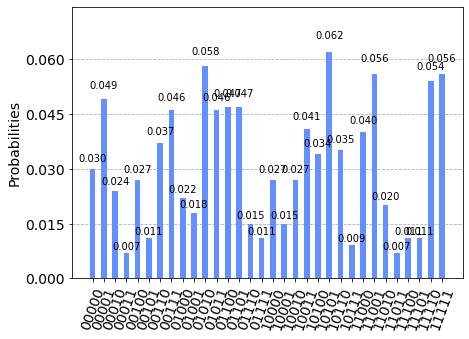

In [6]:
# Set provider
from qiskit.tools.monitor import job_monitor
transpiled = transpile(circuit, device, optimization_level=3)

job = device.run(transpiled, shots = 1000)
job_monitor(job, interval = 2)

results = job.result()
counts = results.get_counts(circuit)
plot_histogram(counts)

We can get expectation values of binary states. That means we have got

\begin{align}
\langle\Psi_{c_0,c_1,c_2,c_3}|\hat{X}_4|\Psi_{c_0,c_1,c_2,c_3}\rangle
\end{align}

for all $c_0,c_1,c_2,c_3$. This also can be represented as

\begin{align}
\langle\psi|\hat{U}_{c_0,c_1,c_2,c_3}^\dagger\hat{X}_4\hat{U}_{c_0,c_1,c_2,c_3}|\psi\rangle.
\end{align}

As we told $\hat{U}_{c_0,c_1,c_2,c_3}$ is one of Pauli operator,

\begin{align}
(-1)^{x(c_0,c_1,c_2,c_3)}\langle\psi|\hat{X}_4|\psi\rangle.
\end{align}

x(c_0,c_1,c_2,c_3) will be determined with the classical information that q0,q1,q2,q3 gives. So, the expactation of $\hat{X}$ can be calculated with

\begin{align}
\langle\hat{X}\rangle=\sum_{c_0,c_1,c_2,c_3}(-1)^{x(c_0,c_1,c_2,c_3)}\langle\Psi_{c_0,c_1,c_2,c_3}|\hat{X}_4|\Psi_{c_0,c_1,c_2,c_3}\rangle.
\end{align}

With same way, we can get $\hat{Y}$,$\hat{Z}$ of teleporated state on q5. Then we can reconstruct the density operator of q5 using $\hat{X},\hat{Y},$ and $\hat{Z}$. The result will be given at dynamical decoupling section.

## Dynamical decoupling

Decoherence is caused by unwanted coupling between qubits and the
surrounding environment. By flipping qubit states dynamically, we can reduce the unwanted
coupling somehow. The flip operations would cost more in gate time, but can greatly prevent
decoherence. See an example in Ref. [2].

Crosstalk between qubits of quantum computer exists even gates are not operating. That is one of huge reason that decrease the fidelity of computing. We will explain dynamical decoupling with a simple example here. Crosstalk between qubits of quantum computer is defined by effective ZZ coupling Hamiltonian

\begin{align}
\hat{H}_{S} = -\frac{w_{q_{1}}}{2}\hat{Z}\otimes\hat{I}  -\frac{w_{q_{2}}}{2}\hat{I}\otimes\hat{Z} +J\hat{Z}\otimes\hat{Z}
\end{align}

where $J$ is ZZ coupling strength, $w_{q_{1}}$ and $w_{q_{2}}$ are qubit frequencies. After $4\tau$, the phase is differently accumulated to computational basis respectively. To reduce this error, we devide $4\tau$ by 3 partite as $\tau, 2\tau, \tau$. And we put $\hat{X}\otimes\hat{I}$ gate between each partites.

\begin{align}
\hat{U}(4\tau)=\mathrm{exp}[-i \hat{H} 4 \tau]&=\hat{U}(\tau)\hat{U}(2\tau)\hat{U}(\tau)\\
&\rightarrow\hat{U}(\tau)\left(\hat{X}\otimes\hat{I}\right)\hat{U}(2\tau)\left(\hat{X}\otimes\hat{I}\right)\hat{U}(\tau)\\
&=\mathrm{exp}[-i 4\tau\frac{w_{q_{2}}}{2}\hat{I}\otimes\hat{Z} ].
\end{align}
As we can see at the last equation, time evolution based on Hamiltonian of ZZ coupling and $\hat{Z}\otimes\hat{I}$ is disappeared. So the error caused of ZZ coupling will be reduced.

We put dynamical decoupling in our circuit. It will look as below.

In [18]:
def dd(q,tt):
    circuit.delay(tt,unit='dt',qarg=q)
    circuit.x(qr[q])
    circuit.delay(tt*2,unit='dt',qarg=q)
    circuit.x(qr[q])
    circuit.delay(tt,unit='dt',qarg=q)

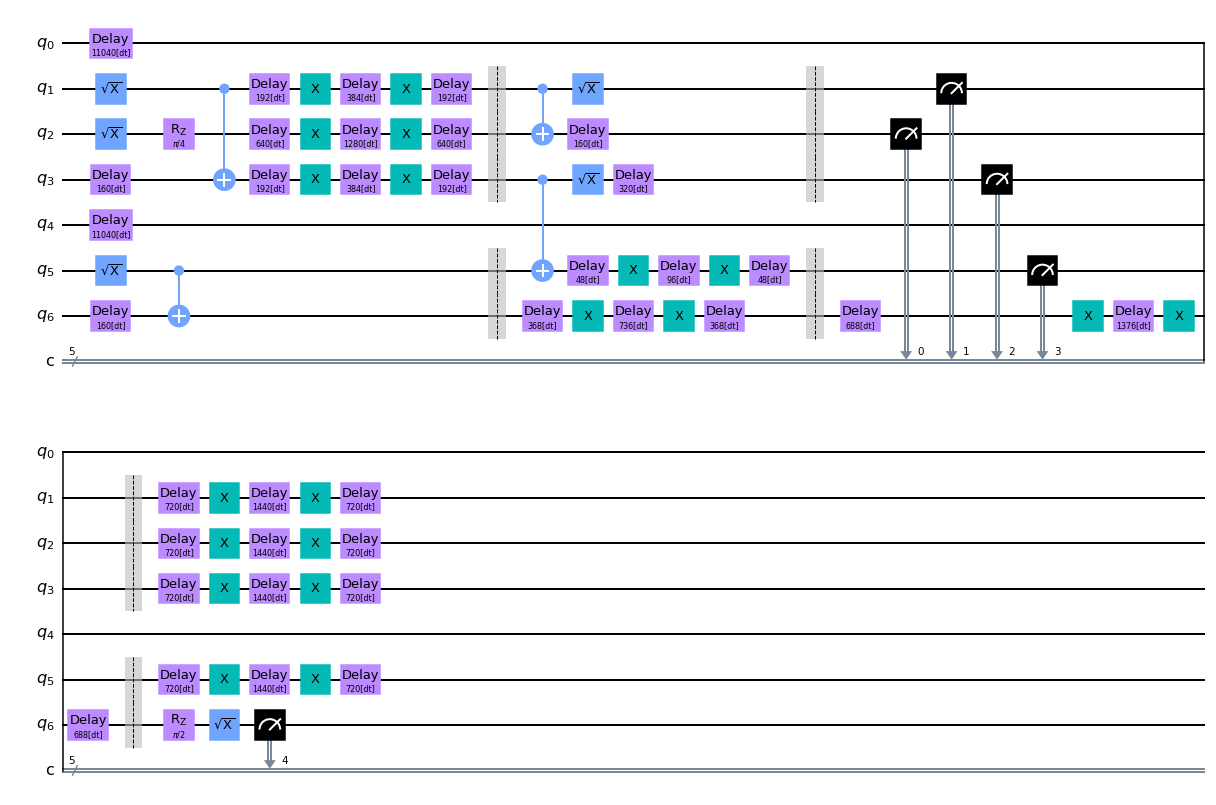

In [19]:
# TELEPORTATION
qr = QuantumRegister(7, 'q')
cr = ClassicalRegister(5, 'c')
#Z
circuit = QuantumCircuit(qr, cr)

circuit.delay(11040,unit='dt',qarg=0)
circuit.sx(qr[2])
circuit.rz(pi/4,qr[2])
dd(2,640)

##############1##################
#i1=1,j1=3 ##up
i1=1
j1=3
circuit.delay(160,unit='dt',qarg=j1)
circuit.sx(qr[i1])
circuit.cx(qr[i1],qr[j1])
################################
dd(1,192)
dd(3,192)

circuit.delay(11040,unit='dt',qarg=4)
##############2##################
#i2=5,j2=6 ##up
i2=5
j2=6
circuit.delay(160,unit='dt',qarg=j2)
circuit.sx(qr[i2])
circuit.cx(qr[i2],qr[j2])
################################
circuit.barrier(qr[2],qr[1],qr[3],qr[5],qr[6])

##############3##################
#i3=2,j3=1 ##up
i3=1
j3=2
circuit.cx(qr[i3],qr[j3])
circuit.sx(qr[i3])
circuit.delay(160,unit='dt',qarg=j3)
################################
##############4##################
#i4=3,j4=5 ##up
i4=3
j4=5
circuit.cx(qr[i4],qr[j4])
circuit.sx(qr[i4])
circuit.delay(320,unit='dt',qarg=i4)
dd(j4,48)
#################################
dd(6,368)
circuit.barrier(qr[2],qr[1],qr[3],qr[5],qr[6])

dd(6,688)
circuit.measure(qr[2],cr[0])
circuit.measure(qr[1],cr[1])
circuit.measure(qr[3],cr[2])
circuit.measure(qr[5],cr[3])
circuit.barrier(qr[2],qr[1],qr[3],qr[5],qr[6])
dd(1,720)
dd(2,720)
dd(3,720)
dd(5,720)

circuit.rz(pi/2,qr[6])
circuit.sx(qr[6])
circuit.measure(qr[6],cr[4])

circuit.draw()

We putted dynamical decoupling if qubit have to wait for a long time without operation nor measurement. Before talking about results, we talk some details about the machine we used.

We used ${\rm \sqrt X}$ gate and ${\rm CNOT}$ gate on behalf of $H$ gate, because the quantum hardware we performed does not support hadamard gate in basic gates.
The result from quantum teleportation shows that DD reduce the error from crosstalk between qubits.
The magnitude of Bloch vector using DD is comparable from gate errors.
Our simulation takes a time similiar with time scale of crosstalks, so that the magnitude of Bloch vector without DD is smaller than the magnetidef using DD.

Several paramters of quantum hardware what we used are represented below
* $J/2π \sim 50 {\rm\ kHz}$
* ${\rm CNOT_{gate}} \sim 300 {\rm\ ns}$
* ${\rm X_{gate}} \sim 30 {\rm\ ns}$
* ${\rm dt} \sim 0.22 {\rm\ ns}$
* $T_1 \sim 200 {\rm\ μs}$
* $T_2 \sim 100 {\rm\ μs}$.

The result is as below.

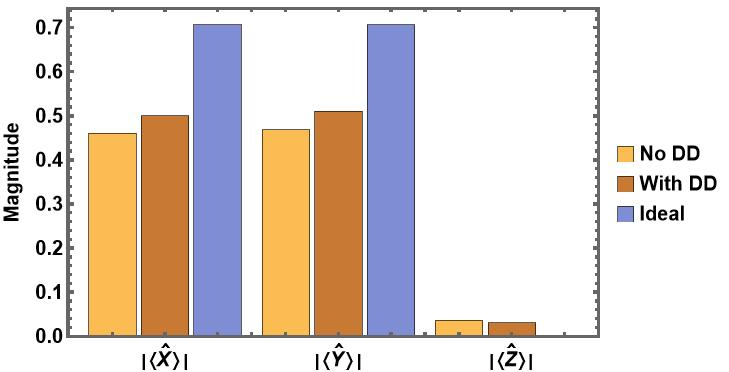

This bar graph represent magnitude of  bloch sphere components $|\langle\hat{X}\rangle|,|\langle\hat{Y}\rangle|,|\langle\hat{Z}\rangle|$ for three different situations. Without dynamical decoupling(DD) experimence data is the orange one, the brown data is done with DD, and blue date is ideal value. As we reduced the ZZ coupling with DD, the fidelity was higher at experimence with DD.

## Randomized compiling

Each quantum gate makes different types of errors and the errors get
fully shuffled during long circuit runs. Thereby, the errors are hard to model and unpredictably
distort the computation results. By twirling quantum gates with Pauli gates, we can tailor the
errors in a predictable way without cost. It allows us to get the computation results with a
subtractable error offset. This technique is called Randomized compiling and Ref. [3] presents
the experimental demonstration.

At our gate we used 4 Bell like transformation operators. The result will not change even if we switch to another Bell like transformation operators while we adjust the result correctly with the new classical information. This changing operators will do the same role as randomized compiling.

We prepare two type of Bell like transformation as below.

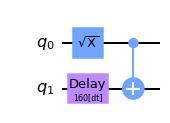

In [20]:
#first Bell like transformation operator
qr = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qr)


circuit.delay(160,unit='dt',qarg=1)
circuit.sx(qr[0])
circuit.cx(qr[0],qr[1])
circuit.draw()

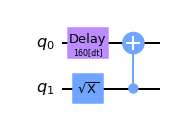

In [7]:
#second Bell like transformation operator
qr = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qr)


circuit.delay(160,unit='dt',qarg=0)
circuit.sx(qr[1])
circuit.cx(qr[1],qr[0])
circuit.draw()

Putting one of operation at the right place inisde our circuit randomly, we got 5 different data. If we draw at Bloch sphere,

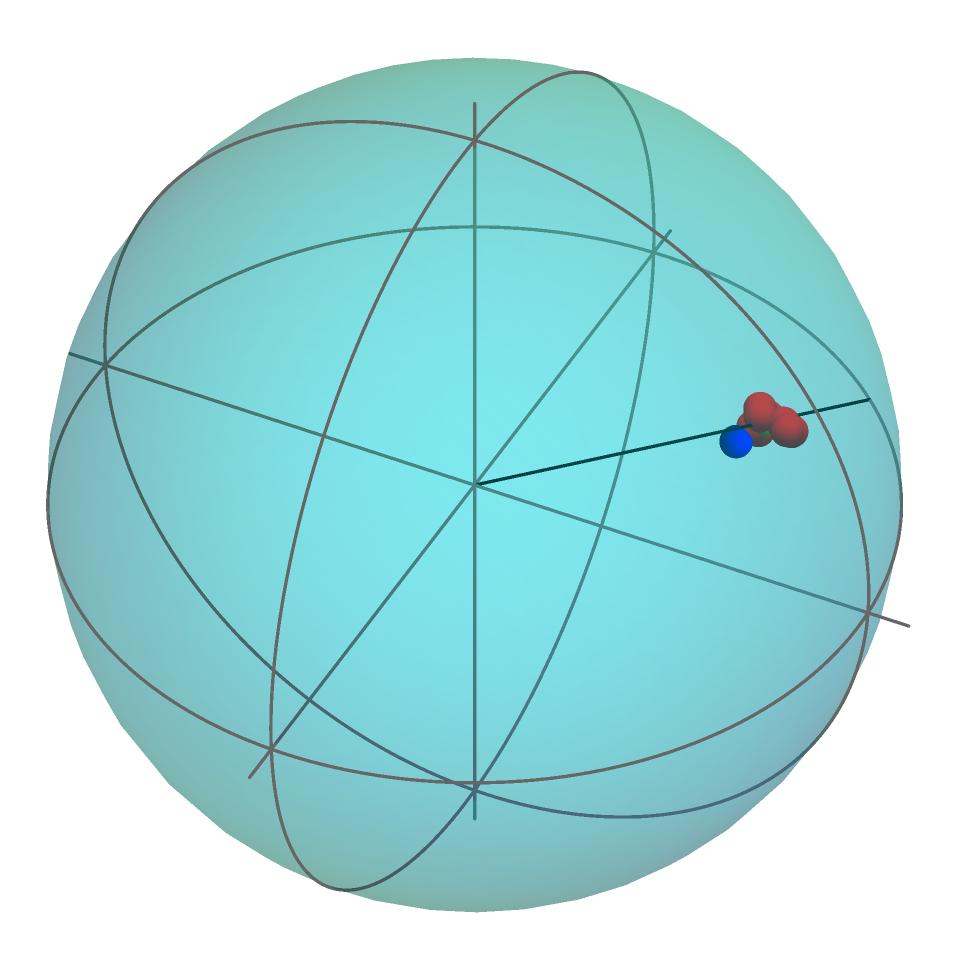

The blue dot represents of data without dynamical decoupling, and the red dots represent randomized compiling data with dynamical decoupling. The black straight line represent the ideal result. We can see the red dots are distributed surrounding the ideal result. To look more carefully we cut the space as 2D and look the distribution.

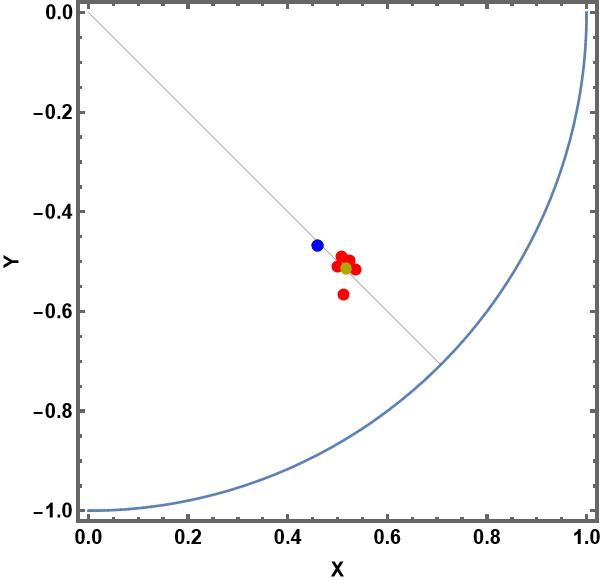
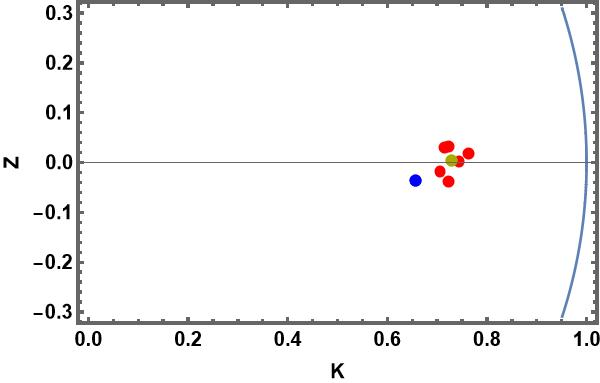

The yellow dots represent the average of red dots. As randomized compiling method, we can get more accurate result as we expected.

## Conclusion

We did three different error mitigation : readout correction, dynamical decoupling, randomized compiling. The error caused by readout is in an inherent error of 0.5 to 1%. 

To look for the other two error mitigation we used quantum teleportation simulated by qiskit quantum machine. As qiskit doesn't provide classical feedback during quantum computation, we put the feedback of classical information at reconstructing quantum state using tomography method. 

We saw dynamical decoupling increases fidelity as reducing ZZ coupling, and randomized compiling enhances fidelity as elemating unitary operation error using different circuit but same role.

### Reference

[1] Qiskit Textbook, https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html

[2] Vinay Tripathi, et al., ArXiv: 2108.04538, (2022) https://arxiv.org/abs/2108.04530

[3] Akel Hashim, Ravi K. Naik, et al., Phys. Rev. X, 11, 041039 (2021) https://journals.aps.org/prx/abstract/10.1103/PhysRevX.11.041039